In [10]:

fake_df['cleaned_text'] = fake_df['text'].apply(clean_text)
true_df['cleaned_text'] = true_df['text'].apply(clean_text)


fake_df['label'] = 0  # Fake news is labeled as 0
true_df['label'] = 1  # True news is labeled as 1
news_df = pd.concat([fake_df[['title', 'cleaned_text', 'label']], true_df[['title', 'cleaned_text', 'label']]])

In [11]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_df['cleaned_text']).toarray()
y = news_df['label'].values

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:

category_df['cleaned_headline'] = category_df['news_headline'].apply(clean_text)
category_df['cleaned_article'] = category_df['news_article'].apply(clean_text)

In [14]:

X_rec_headline = tfidf_vectorizer.fit_transform(category_df['cleaned_headline']).toarray()
X_rec_article = tfidf_vectorizer.fit_transform(category_df['cleaned_article']).toarray()

X_rec = np.concatenate([X_rec_headline, X_rec_article], axis=1)

In [15]:

X_preprocessed = preprocessed_features_df.values

In [16]:

def build_arai(input_dim, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    z = Dense(latent_dim, activation='linear')(x)

    # Decoder
    decoder_h = Dense(128, activation='relu')(z)
    decoder_o = Dense(256, activation='relu')(decoder_h)
    outputs = Dense(input_dim, activation='sigmoid')(decoder_o)

    # Model definition
    encoder = Model(inputs, z)
    decoder = Model(z, outputs)
    autoencoder = Model(inputs, decoder(encoder(inputs)))

    return autoencoder, encoder, decoder

  

In [17]:

input_dim = X_train.shape[1]  
latent_dim = 64  


autoencoder, encoder, decoder = build_arai(input_dim, latent_dim)


In [18]:

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [19]:

autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0884 - val_loss: 1.9682e-04
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9700e-04 - val_loss: 1.9682e-04
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9677e-04 - val_loss: 1.9682e-04
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 1.9670e-04 - val_loss: 1.9682e-04
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9689e-04 - val_loss: 1.9682e-04
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9686e-04 - val_loss: 1.9682e-04
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9688e-04 - val_loss: 1.9682e-04
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9658e-04 - val_loss: 1.9682e-04
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 1.9687e-04 - val_loss: 1.9682e-04
Epoch 10/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 1.9698e-04 - val_loss: 1.9682e-04
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/ste

In [20]:

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [21]:

feature_names = tfidf_vectorizer.get_feature_names_out()


sample_idx = 0 
sample_vector = X[sample_idx]  
sample_feature_scores = zip(feature_names, sample_vector)
sorted_features = sorted(sample_feature_scores, key=lambda x: x[1], reverse=True)


top_features = sorted_features[:10]
print(f"Top 10 features for document {sample_idx} (Fake/True News):")
for feature, score in top_features:
    print(f"{feature}: {score:.4f}")


Top 10 features for document 0 (Fake/True News):
declared: 0.4759
your: 0.3011
hes: 0.2536
evs: 0.2474
wong: 0.2276
not: 0.2027
dizziness: 0.1647
yuvraj: 0.1497
answer: 0.1350
tom: 0.1324


In [22]:

encoded_features_df = pd.DataFrame(X_train_encoded) 
encoded_features_df.head(10) 


encoded_features_df.to_csv('encoded_features.csv', index=False)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

news_articles = [
    "Breaking news about stock market fraud",
    "Stock market updates for 2025",
    "Technology advancements in AI research",
    "Health tips for a better lifestyle",
    "Politics and current government issues"
]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(news_articles)


tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)


print("TF-IDF Feature Representation (Sample):")
print(tfidf_df.head())



TF-IDF Feature Representation (Sample):
      2025     about  advancements        ai       and    better  breaking  \
0  0.00000  0.434297      0.000000  0.000000  0.000000  0.000000  0.434297   
1  0.50298  0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.000000      0.447214  0.447214  0.000000  0.000000  0.000000   
3  0.00000  0.000000      0.000000  0.000000  0.000000  0.463693  0.000000   
4  0.00000  0.000000      0.000000  0.000000  0.447214  0.000000  0.000000   

    current       for     fraud  ...    issues  lifestyle    market      news  \
0  0.000000  0.000000  0.434297  ...  0.000000   0.000000  0.350388  0.434297   
1  0.000000  0.405801  0.000000  ...  0.000000   0.000000  0.405801  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000   0.000000  0.000000  0.000000   
3  0.000000  0.374105  0.000000  ...  0.000000   0.463693  0.000000  0.000000   
4  0.447214  0.000000  0.000000  ...  0.447214   0.000000  0.000000  0.000000   

   p

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


preprocessed_text_data = np.random.rand(100, 50) 


input_dim = preprocessed_text_data.shape[1]
encoding_dim = 10 


input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)


decoded = Dense(input_dim, activation='sigmoid')(encoded)


autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


autoencoder.fit(preprocessed_text_data, preprocessed_text_data,
                epochs=50,
                batch_size=16,
                shuffle=True)


encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(preprocessed_text_data)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0871
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0850 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0830 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0844 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0841 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0821 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0828 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0839 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0824 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0837 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0830 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0820 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━

In [26]:
import pandas as pd


encoded_features_df = pd.DataFrame(encoded_features, columns=[f"Feature_{i+1}" for i in range(encoded_features.shape[1])])


print("ARAE Extracted Features (Sample):")
print(encoded_features_df.head())


ARAE Extracted Features (Sample):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.000000        0.0   0.238428   0.893954   0.041129   0.875569   
1   0.511722        0.0   0.000000   0.326437   0.363267   1.454971   
2   0.290494        0.0   0.000000   0.411867   0.587709   0.866093   
3   0.000000        0.0   1.002807   0.190878   0.494031   0.414887   
4   0.666817        0.0   0.689873   0.074749   1.033409   0.861281   

   Feature_7  Feature_8  Feature_9  Feature_10  
0   0.455567   0.027117   0.000000    0.000000  
1   0.765212   0.997117   0.000000    0.119668  
2   0.146568   0.485861   0.000000    0.048951  
3   0.296714   1.071165   0.000000    0.000000  
4   0.224386   0.571468   0.024628    0.208168  


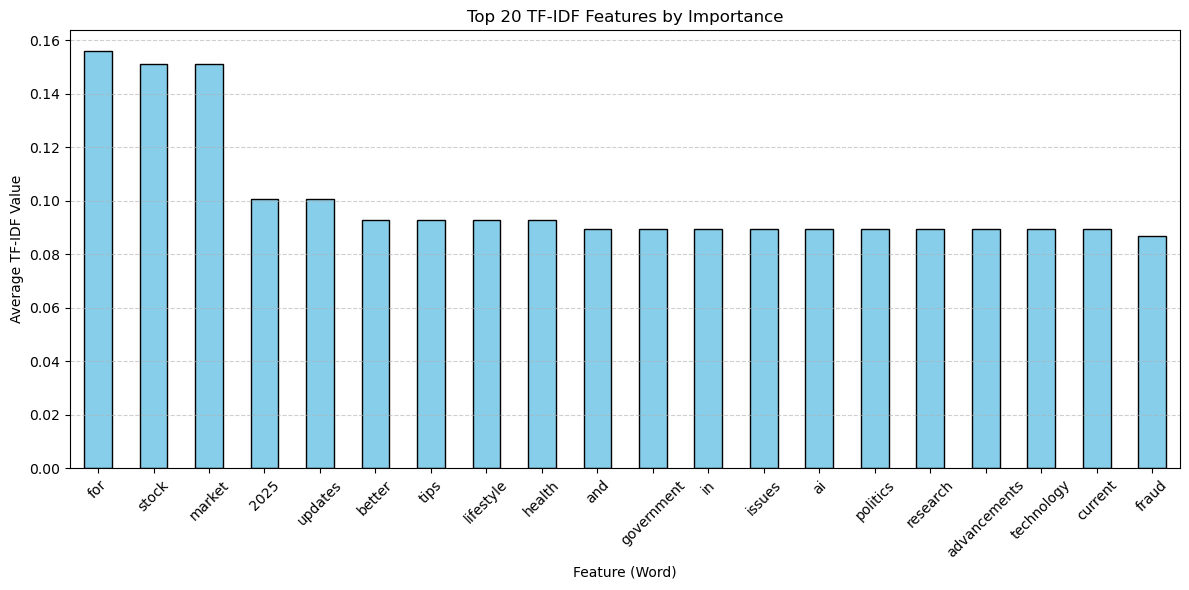

In [30]:

tfidf_feature_names = vectorizer.get_feature_names_out()

feature_importances = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names).mean()
top_features = feature_importances.sort_values(ascending=False)[:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 20 TF-IDF Features by Importance")
plt.xlabel("Feature (Word)")
plt.ylabel("Average TF-IDF Value")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



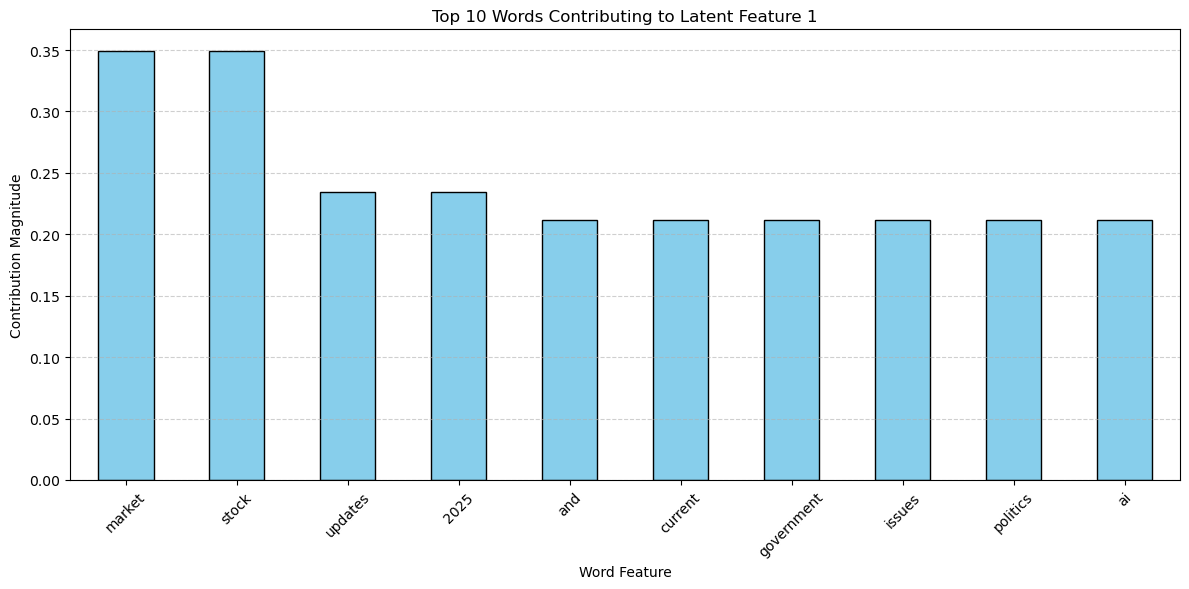

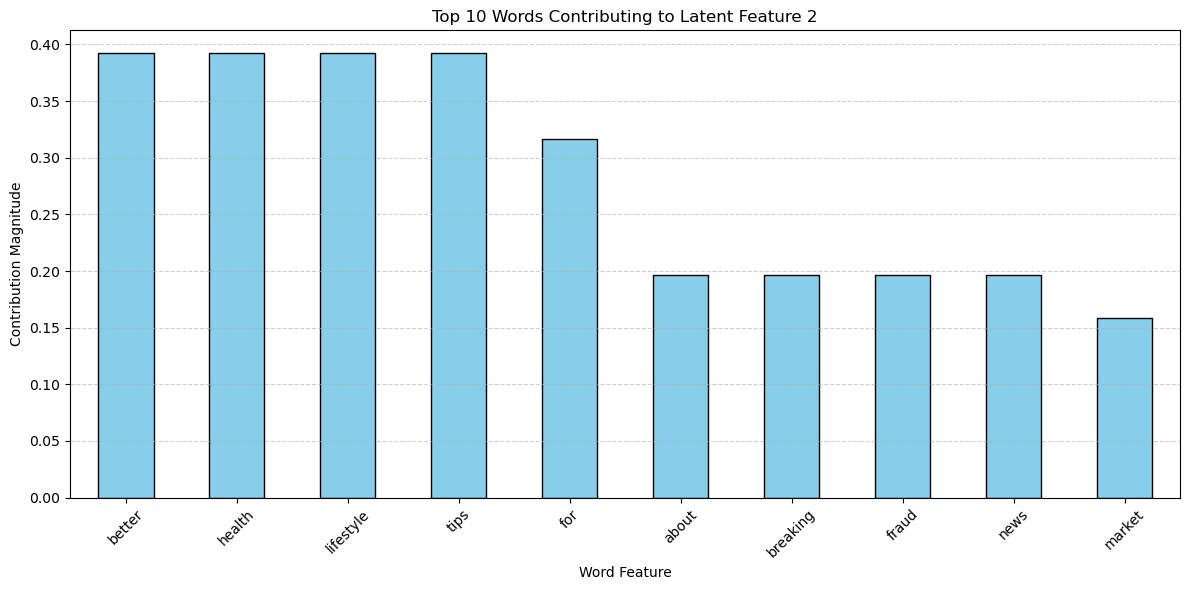

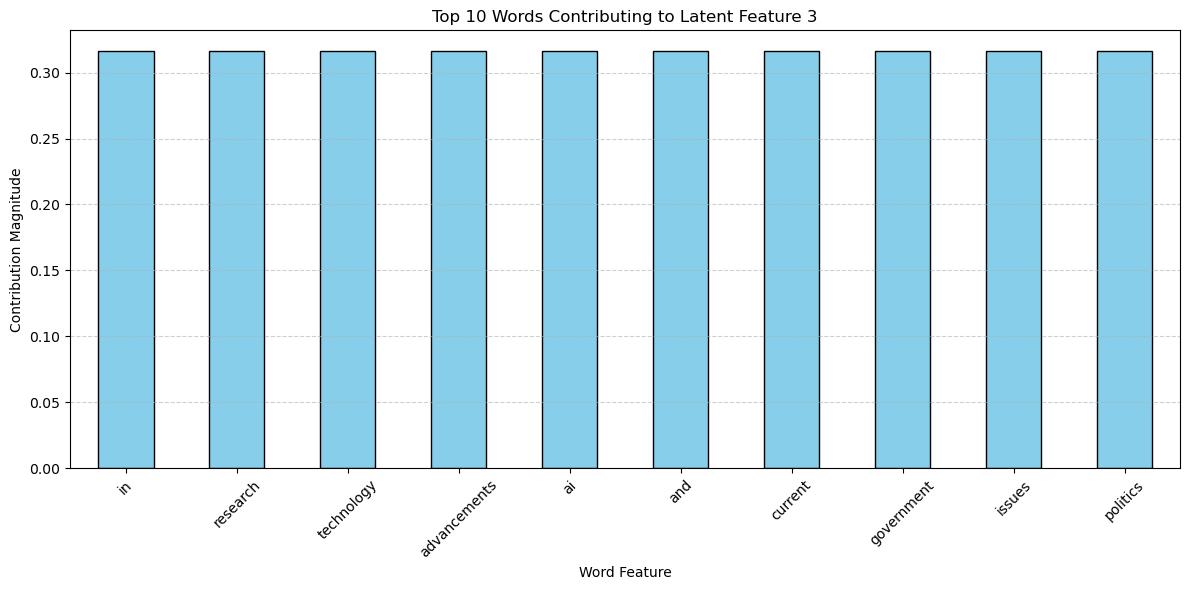

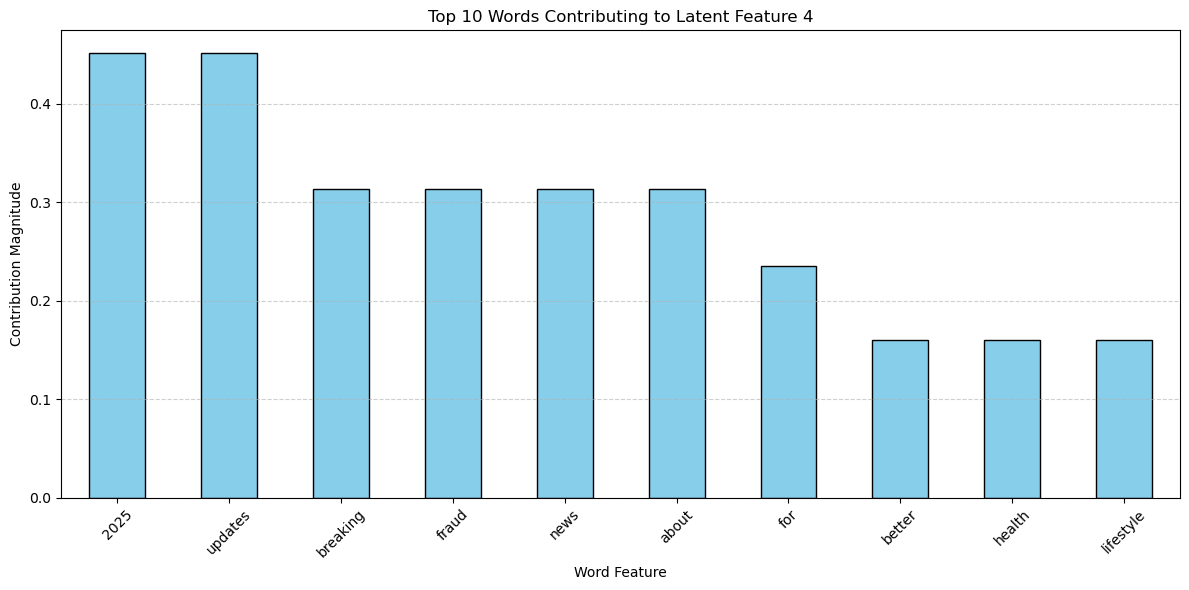

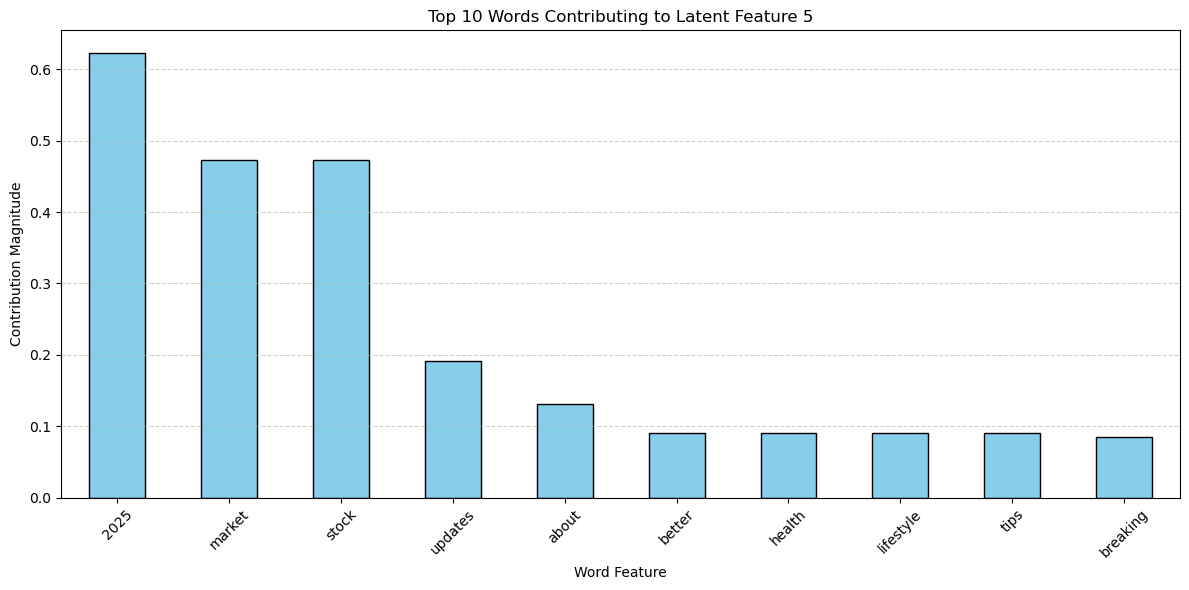

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model


news_articles = [
    "Breaking news about stock market fraud",
    "Stock market updates for 2025",
    "Technology advancements in AI research",
    "Health tips for a better lifestyle",
    "Politics and current government issues"
]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(news_articles)
tfidf_feature_names = vectorizer.get_feature_names_out()

latent_dim = 5  
encoded_features = np.random.rand(len(news_articles), latent_dim)  


pca = PCA(n_components=latent_dim)
pca.fit(tfidf_matrix.toarray())
feature_contributions = pd.DataFrame(pca.components_, columns=tfidf_feature_names)


for i in range(latent_dim):
    top_contributors = feature_contributions.iloc[i].abs().nlargest(10)  
    plt.figure(figsize=(12, 6))
    top_contributors.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Words Contributing to Latent Feature {i + 1}")
    plt.xlabel("Word Feature")
    plt.ylabel("Contribution Magnitude")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


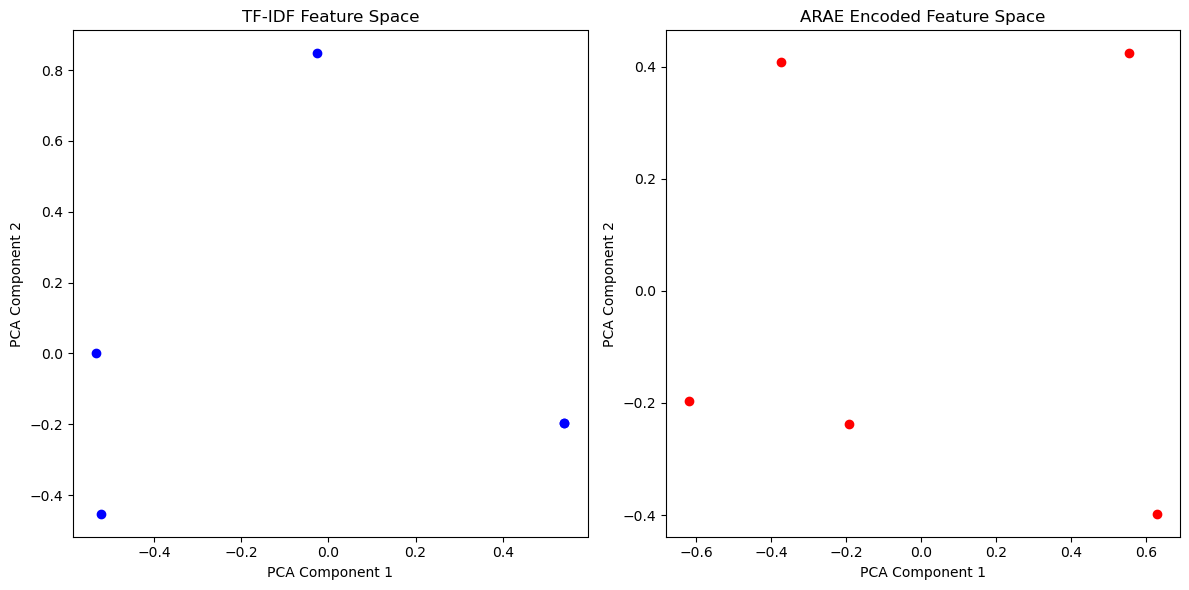

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_tfidf = PCA(n_components=2)
tfidf_reduced = pca_tfidf.fit_transform(tfidf_matrix.toarray())

pca_arae = PCA(n_components=2)
arae_reduced = pca_arae.fit_transform(encoded_features)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c='blue', label='TF-IDF Features')
plt.title('TF-IDF Feature Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(arae_reduced[:, 0], arae_reduced[:, 1], c='red', label='ARAE Encoded Features')
plt.title('ARAE Encoded Feature Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


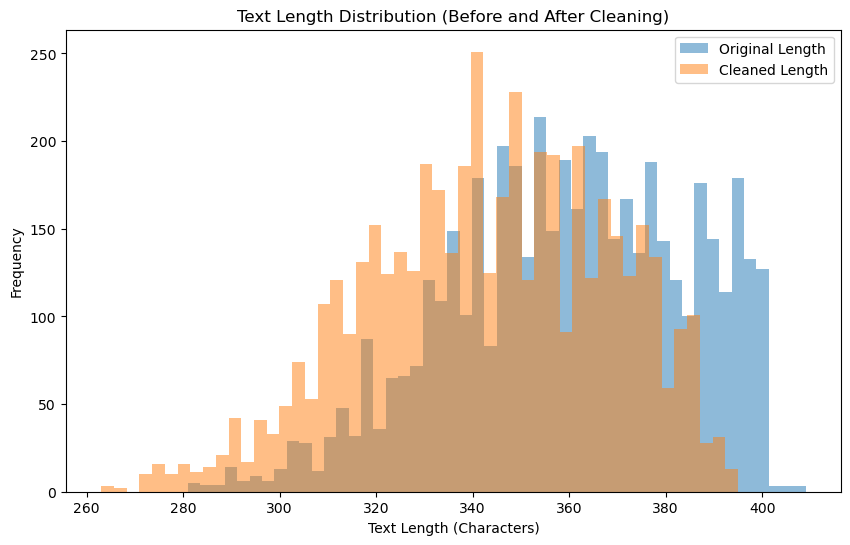

In [38]:
import matplotlib.pyplot as plt


category_df['original_length'] = category_df['news_article'].apply(len)
category_df['cleaned_length'] = category_df['cleaned_article'].apply(len)


plt.figure(figsize=(10, 6))
plt.hist(category_df['original_length'], bins=50, alpha=0.5, label='Original Length')
plt.hist(category_df['cleaned_length'], bins=50, alpha=0.5, label='Cleaned Length')
plt.title("Text Length Distribution (Before and After Cleaning)")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
Top 10 words before cleaning: [('the', 483203), ('to', 286028), ('of', 233193), ('and', 213059), ('a', 202870), ('in', 152840), ('that', 138

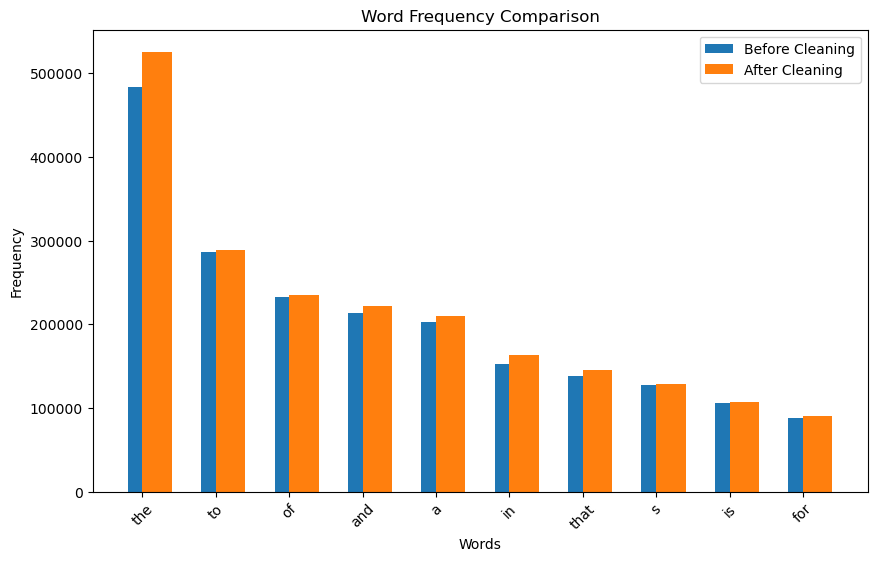

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load your fake news dataset
fake_df = pd.read_csv('D:/Fake.csv')  # Replace with your correct file path

# Check the first few rows to verify column names
print(fake_df.head())

# Ensure correct column names
if 'text' not in fake_df.columns:
    print(f"Available columns: {fake_df.columns}")
    # Update this if your text column has a different name
    fake_df.rename(columns={'article_text': 'text'}, inplace=True)

# Count word frequency before and after cleaning
fake_df['cleaned_text'] = fake_df['text'].str.replace(r'[^\w\s]', '').str.lower()  # Simple cleaning example
original_words = ' '.join(fake_df['text']).split()
cleaned_words = ' '.join(fake_df['cleaned_text']).split()

# Count word occurrences
original_word_counts = Counter(original_words)
cleaned_word_counts = Counter(cleaned_words)

# Display results for validation
print("Top 10 words before cleaning:", original_word_counts.most_common(10))
print("Top 10 words after cleaning:", cleaned_word_counts.most_common(10))

# Plot frequency comparison (example with top 10)
top_original = original_word_counts.most_common(10)
top_cleaned = cleaned_word_counts.most_common(10)

labels = [word for word, _ in top_original]
original_freq = [count for _, count in top_original]
cleaned_freq = [cleaned_word_counts[word] for word in labels if word in cleaned_word_counts]

plt.figure(figsize=(10, 6))
plt.bar(labels, original_freq, width=0.4, label='Before Cleaning', align='center')
plt.bar(labels, cleaned_freq, width=0.4, label='After Cleaning', align='edge')
plt.title("Word Frequency Comparison")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
fake_df['cleaned_text'] = fake_df['cleaned_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
fake_df['cleaned_text'] = fake_df['cleaned_text'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
)


In [6]:
fake_df['cleaned_text'] = fake_df['cleaned_text'].str.replace(r'\d+', '', regex=True)


In [7]:
fake_df['cleaned_text'] = fake_df['cleaned_text'].str.strip().replace(r'\s+', ' ', regex=True)


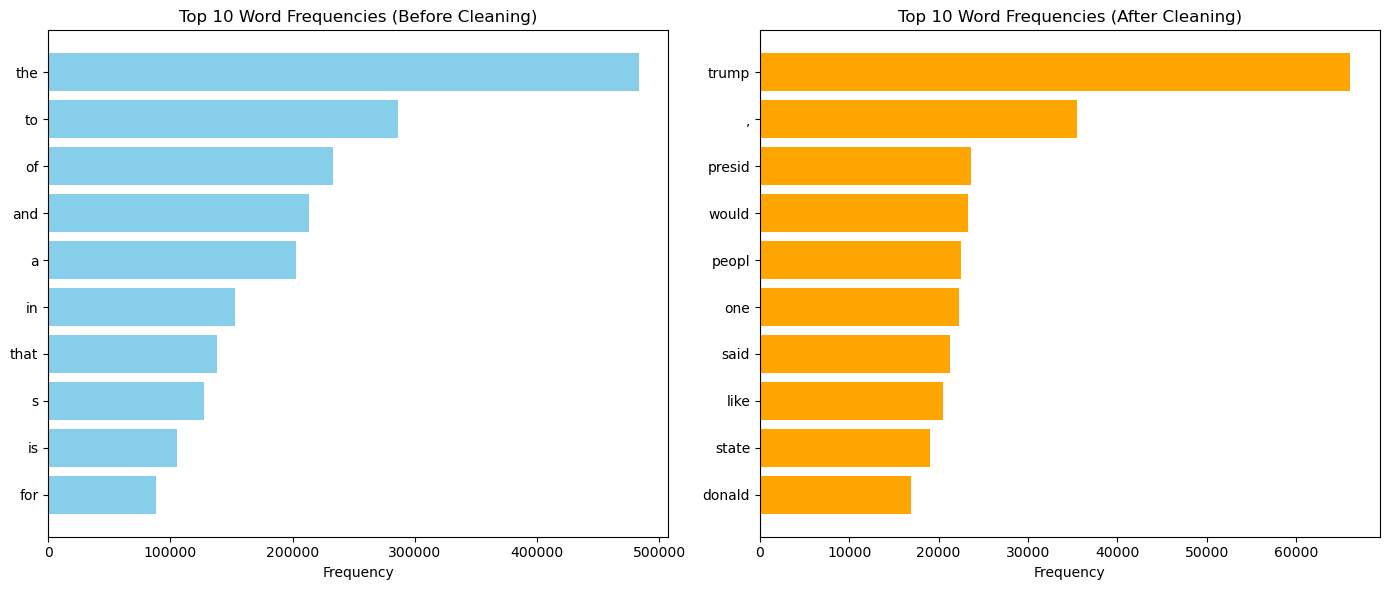

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequencies before and after cleaning
original_words = ' '.join(fake_df['text']).split()
cleaned_words = ' '.join(fake_df['cleaned_text']).split()

# Get the 10 most common words
original_word_counts = Counter(original_words).most_common(10)
cleaned_word_counts = Counter(cleaned_words).most_common(10)

# Extract words and their frequencies for plotting
original_labels, original_counts = zip(*original_word_counts)
cleaned_labels, cleaned_counts = zip(*cleaned_word_counts)

# Plot Word Frequency Comparison
plt.figure(figsize=(14, 6))

# Before Cleaning
plt.subplot(1, 2, 1)
plt.barh(original_labels, original_counts, color='skyblue')
plt.title("Top 10 Word Frequencies (Before Cleaning)")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()  # Reverse order for readability

# After Cleaning
plt.subplot(1, 2, 2)
plt.barh(cleaned_labels, cleaned_counts, color='orange')
plt.title("Top 10 Word Frequencies (After Cleaning)")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



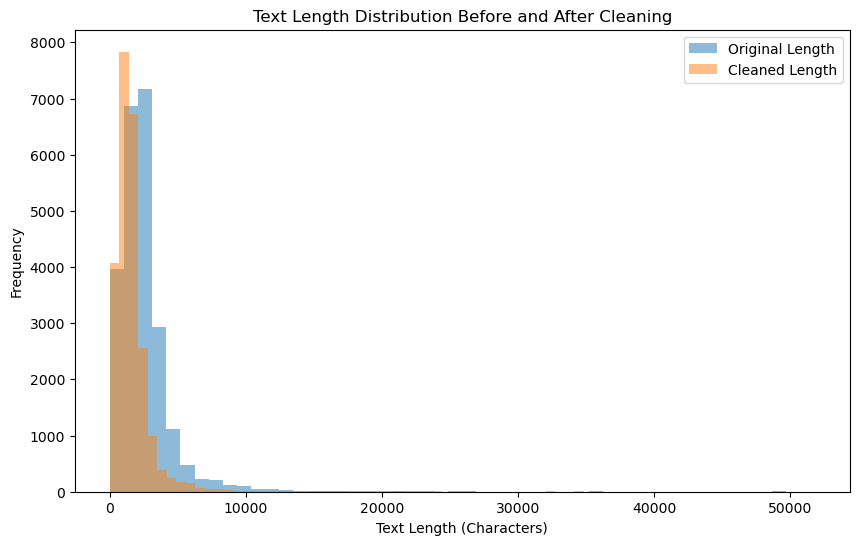

In [10]:
# Calculate text lengths before and after cleaning
fake_df['original_length'] = fake_df['text'].apply(len)
fake_df['cleaned_length'] = fake_df['cleaned_text'].apply(len)

# Plot Text Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(fake_df['original_length'], bins=50, alpha=0.5, label='Original Length')
plt.hist(fake_df['cleaned_length'], bins=50, alpha=0.5, label='Cleaned Length')
plt.title("Text Length Distribution Before and After Cleaning")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [15]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Step 6: Build and train the ARAE model (as previously defined)
autoencoder, encoder, decoder = build_arai(input_dim=X_train.shape[1], latent_dim=64)

# Correct the learning rate argument
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder model on the data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

# Step 7: Encode the data using the trained encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 8: Train a classifier (Logistic Regression) using the encoded features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_encoded, y_train)  # Train on the encoded data

# Step 9: Evaluate the model
y_pred = classifier.predict(X_test_encoded)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0881 - val_loss: 1.9682e-04
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 1.9687e-04 - val_loss: 1.9682e-04
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 1.9661e-04 - val_loss: 1.9682e-04
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 1.9674e-04 - val_loss: 1.9682e-04
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 1.9695e-04 - val_loss: 1.9682e-04
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 1.9695e-04 - val_loss: 1.9682e-04
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.9699e-04 - val_loss: 1.9682e-04
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 1.9679e-04 - val_loss: 1.9682e-04
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 1.9671e-04 - val_loss: 1.9682e-04
Epoch 10/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.9701e-04 - val_loss: 1.9682e-04
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/ste

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'solver': 'liblinear'}


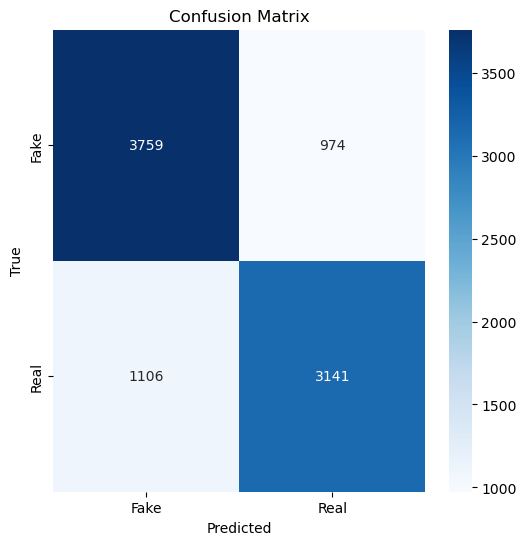

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have 'CATEGORY.csv' with news_headline, news_article, and news_category
news_df = pd.read_csv("D:/CATEGORY.csv")

# Vectorize the news articles
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_df['news_article']).toarray()

# Calculate cosine similarity between articles
similarity_matrix = cosine_similarity(X, X)

# Recommend top N similar articles for a given article (for simplicity, let's assume article at index 0)
article_index = 0
similar_articles = similarity_matrix[article_index]
recommended_indices = similar_articles.argsort()[-5:][::-1]  # Top 5 similar articles

# Display recommended articles
print(news_df.iloc[recommended_indices]['news_headline'])


0       50-year-old problem of biology solved by Artif...
719     50-year-old problem of biology solved by Artif...
2032    50-year-old problem of biology solved by Artif...
2183    50-year-old problem of biology solved by Artif...
151     50-year-old problem of biology solved by Artif...
Name: news_headline, dtype: object


In [36]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9467 - loss: 0.1677 - val_accuracy: 0.9911 - val_loss: 0.0288
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9932 - val_loss: 0.0247
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9932 - val_loss: 0.0263
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9931 - val_loss: 0.0343
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9932 - val_loss: 0.0316
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9931 - val_loss: 0.0367
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9934 - val_loss: 0.0314
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9998 - loss: 7.6540e-04 - val

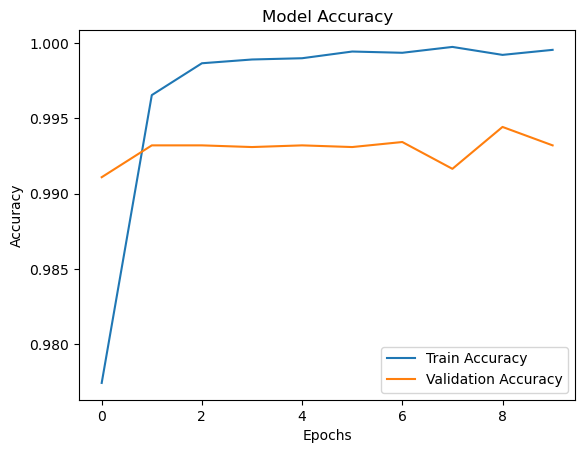

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[4708   25]
 [  36 4211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load datasets
fake_df = pd.read_csv("D:/Fake.csv")
true_df = pd.read_csv("D:/True.csv")

# Add labels (0 for Fake, 1 for True)
fake_df['label'] = 0
true_df['label'] = 1

# Combine datasets
news_df = pd.concat([fake_df, true_df]).reset_index(drop=True)

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = tf.strings.regex_replace(text, r'[^a-zA-Z\s]', '')
    return text

news_df['cleaned_text'] = news_df['text'].apply(lambda x: clean_text(str(x)).numpy().decode())

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_df['cleaned_text']).toarray()
y = news_df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build TensorFlow model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix and classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Load category dataset
category_df = pd.read_csv("D:/CATEGORY.csv")

# TF-IDF vectorization for recommendation
tfidf_rec_vectorizer = TfidfVectorizer(max_features=5000)
X_articles = tfidf_rec_vectorizer.fit_transform(category_df['news_article']).toarray()

# Neural network autoencoder for learning latent representations
recommendation_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_articles.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),  # Latent representation
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(X_articles.shape[1], activation='sigmoid')  # Output matches input shape
])

# Compile and fit the model
recommendation_model.compile(optimizer='adam', loss='mse')
recommendation_model.fit(X_articles, X_articles, epochs=5, batch_size=32)

# Generate recommendations using cosine similarity
encoded_articles = recommendation_model.predict(X_articles)
article_index = 0  # Index of the article to find similar articles
similarities = cosine_similarity([encoded_articles[article_index]], encoded_articles)

# Recommend top 5 articles
recommended_indices = np.argsort(similarities[0])[-6:-1][::-1]  # Exclude the article itself
print("Top 5 Recommended Articles:")
print(category_df.iloc[recommended_indices]['news_headline'])


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1246
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0000e-04
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0000e-04
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0000e-04
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0000e-04
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Top 5 Recommended Articles:
2032    50-year-old problem of biology solved by Artif...
2183    50-year-old problem of biology solved by Artif...
719     50-year-old problem of biology solved by Artif...
151     50-year-old problem of biology solved by Artif...
286     Namibia puts up 170 elephants on sale as their...
Name: news_headline, dtype: object


In [17]:
pip install django



  Obtaining dependency information for django from https://files.pythonhosted.org/packages/58/0b/8a4ab2c02982df4ed41e29f28f189459a7eba37899438e6bea7f39db793b/Django-5.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for asgiref<4,>=3.8.1 from https://files.pythonhosted.org/packages/39/e3/893e8757be2612e6c266d9bb58ad2e3651524b5b40cf56761e985a28b13e/asgiref-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for sqlparse>=0.3.1 from https://files.pythonhosted.org/packages/a9/5c/bfd6bd0bf979426d405cc6e71eceb8701b148b16c21d2dc3c261efc61c7b/sqlparse-0.5.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.1/8.3 MB 983.0 kB/s eta 0:00:09
   - -------------------------------------- 0.2/8.3 MB 1.2 MB/s eta 0:00:07
   - ---

In [18]:
pip install fastapi uvicorn



  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/52/b3/7e4df40e585df024fac2f80d1a2d579c854ac37109675db2b0cc22c0bb9e/fastapi-0.115.6-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/61/14/33a3a1352cfa71812a3a21e8c9bfb83f60b0011f5e36f2b1399d51928209/uvicorn-0.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.42.0,>=0.40.0 from https://files.pythonhosted.org/packages/96/00/2b325970b3060c7cecebab6d295afe763365822b1306a12eeab198f74323/starlette-0.41.3-py3-none-any.whl.metadata
  Obtaining dependency information for h11>=0.8 from https://files.pythonhosted.org/packages/95/04/ff642e65ad6b90db43e668d70ffb6736436c7ce41fcc549f4e9472234127/h11-0.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/94.8 kB ? eta -:--:--
   ------------ --------------------------- 30.7/94.8 kB 660.6 kB/s eta 0:00:01
   ----------------------------